<a href="https://colab.research.google.com/github/Awonke03/Customer-Churn-WebApp/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [6]:
import pandas as pd
import plotly.graph_objects as go
import pickle
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense
import plotly.express as px


In [15]:
dt=pd.read_csv("/content/drive/MyDrive/Customer Chan/Churn_Modelling.csv")
dt.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3041,3042,15783029,Monaldo,671,France,Male,34,7,106603.74,2,1,1,26387.71,0
8168,8169,15599182,Reynolds,597,Spain,Female,33,2,0.00,2,1,1,4700.66,0
9596,9597,15755084,Bezrukova,531,France,Male,37,7,121854.45,1,1,0,147521.35,0
5741,5742,15725036,Jideofor,709,France,Male,42,9,118546.71,1,0,1,77142.85,0
6658,6659,15777873,Downer,628,France,Female,31,5,0.00,1,0,0,147963.07,1
8671,8672,15689526,Shih,542,Germany,Female,35,9,127543.11,2,1,0,468.94,1
1948,1949,15569187,Fleming,680,Spain,Male,35,9,0.00,2,0,0,143774.06,0
7200,7201,15593959,Travis,524,France,Male,28,1,93577.30,1,1,1,51670.82,0
7410,7411,15752344,She,714,Spain,Male,34,5,0.00,2,1,0,193040.32,0
6957,6958,15802274,Waters,686,France,Female,44,7,55053.62,1,1,0,181757.19,0


In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [7]:
fig = px.histogram(dt, x='Age', color='Exited', marginal='rug',
                   labels={'Exited': 'Churn Status'},
                   title='Age Distribution by Churn Status',
                   color_discrete_sequence=px.colors.sequential.Viridis,
                   opacity=0.7, nbins=20)
fig.show()

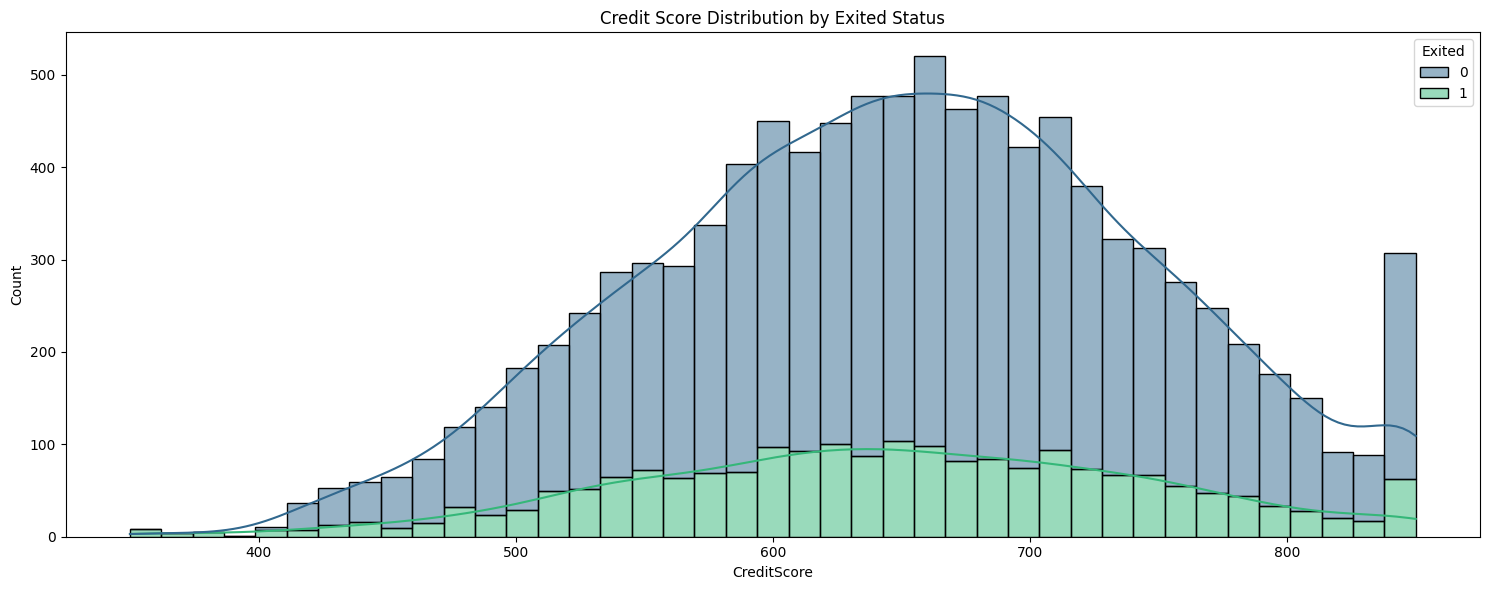

In [8]:
plt.figure(figsize=(15, 6))

sns.histplot(data=dt, x='CreditScore', hue='Exited',  multiple="stack",kde=True,  palette="viridis")
plt.title('Credit Score Distribution by Exited Status')

plt.tight_layout()
plt.show()

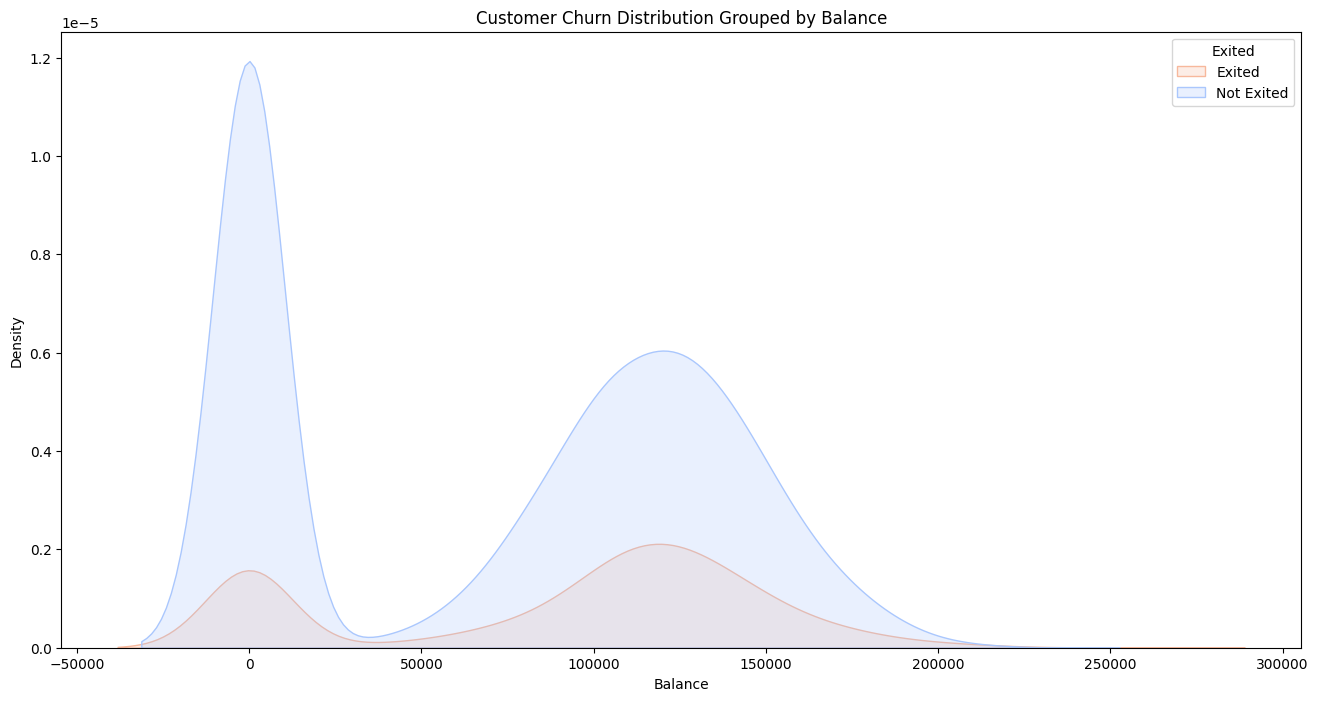

In [9]:
plt.figure(figsize=(16, 8))
sns.kdeplot(data=dt, x='Balance', hue='Exited', fill=True, palette='coolwarm')

# Add a legend
plt.legend(title='Exited', labels=['Exited', 'Not Exited'])

plt.title('Customer Churn Distribution Grouped by Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

In [10]:
df = dt.copy()
df['Exited'] = df['Exited'].map({1:'Stayed', 0:'Exited'})
px.sunburst(df, color='Exited', path=['Geography', 'Gender', 'Exited'], height=500, width=500)

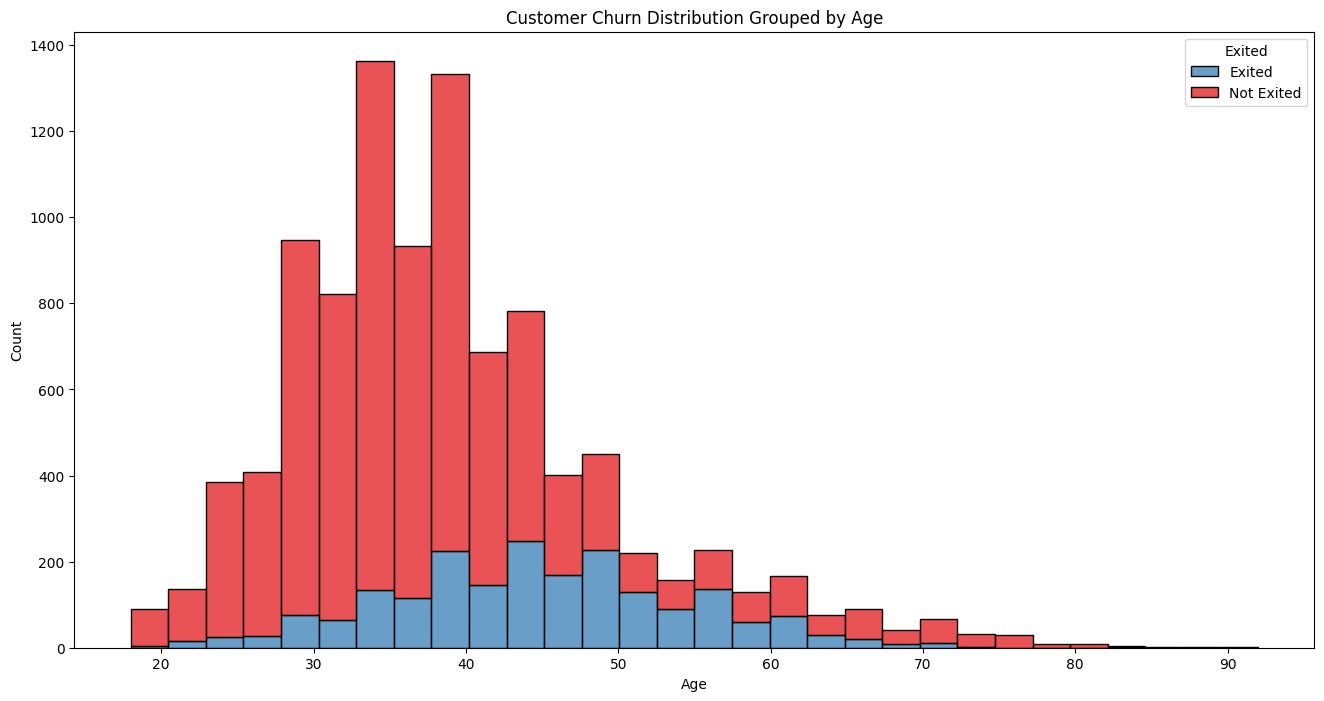

In [11]:
plt.figure(figsize=(16, 8))
sns.histplot(data=dt, x='Age', hue='Exited', multiple='stack', bins=30, palette='Set1')

# Add a legend
plt.legend(title='Exited', labels=['Exited', 'Not Exited'])

plt.title('Customer Churn Distribution Grouped by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-12-1a5727b99249>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



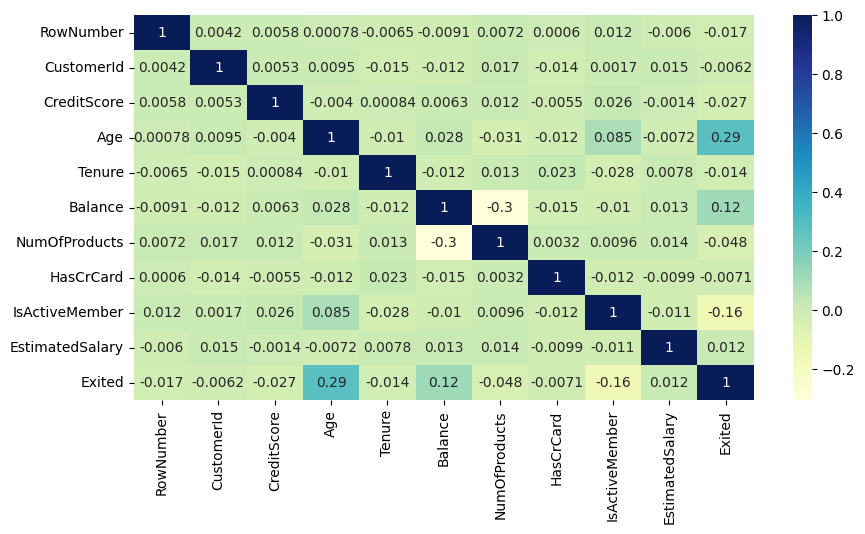

In [12]:
#heatmap
num_churn = dt.drop(['Geography','Gender'],axis=1)

plt.figure(figsize=(10,5))
cor=num_churn.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
import joblib

# Assuming 'dt' is your DataFrame
dt = dt.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dt = pd.get_dummies(dt, columns=['Geography', 'Gender'], drop_first=True)

X = dt.drop('Exited', axis=1)
y = dt['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Simple Neural Network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Save the neural network model
model_nn.save('path_to_nn_model.h5')

# Save the scaler
joblib.dump(scaler, 'path_to_scaler.pkl')

y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype(int)

# Calculate accuracies and classification reports
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn)

print("Test Set Accuracies:")
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:\n", classification_report_rf)

print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report:\n", classification_report_svm)

print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print("\nClassification Report:\n", classification_report_gb)

print("\nGaussian Naive Bayes:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("\nClassification Report:\n", classification_report_nb)

print("\nSimple Neural Network:")
print(f"Accuracy: {accuracy_nn:.2f}")
print("\nClassification Report:\n", classification_report_nn)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



63/63 [==============================] - 1s 4ms/step
Test Set Accuracies:
Random Forest:
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Support Vector Machine (SVM):
Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000


Gradient Boosting:
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.

In [17]:
with open('path_to_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


with open('path_to_svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

with open('path_to_gb_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

with open('path_to_nb_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

model_nn.save('path_to_nn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [18]:
model_names = ['Random Forest', 'SVM', 'Gradient Boosting', 'Naive Bayes', 'Neural Network']
accuracies = [accuracy_rf, accuracy_svm, accuracy_gb, accuracy_nb, accuracy_nn]


fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies, text=accuracies, textposition='auto',
                             marker_color=['blue', 'orange', 'green', 'purple', 'red'])])
fig.update_layout(title='Model Accuracies',
                  xaxis_title='Models',
                  yaxis_title='Accuracy',
                  yaxis=dict(tickformat=".2%", range=[0, 1]))
fig.show()



In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import load_model

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train_scaled, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model = gb_model.fit(X_train_scaled, y_train)

nn_model = load_model('path_to_nn_model.h5')

new_data = pd.DataFrame({
    'CreditScore': [750],
    'Age': [35],
    'Tenure': [5],
    'Balance': [10000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000],
    'Geography_Germany': [0],
    'Geography_Spain': [1],
    'Gender_Male': [1]})

new_data_scaled = scaler.transform(new_data)
# Testing the predictions of the models
prediction_rf = rf_model.predict(new_data_scaled)
prediction_gb = gb_model.predict(new_data_scaled)
prediction_nn_prob = nn_model.predict(new_data_scaled)
prediction_nn = (prediction_nn_prob > 0.5).astype(int)

print("Random Forest Prediction:", prediction_rf)
print("Gradient Boosting Prediction:", prediction_gb)
print("Neural Network Prediction (Probability):", prediction_nn_prob)
print("Neural Network Prediction (Binary):", prediction_nn)


1/1 [==============================] - 0s 64ms/step
Random Forest Prediction: [0]
Gradient Boosting Prediction: [0]
Neural Network Prediction (Probability): [[0.00730086]]
Neural Network Prediction (Binary): [[0]]


In [23]:
pip install flask-cors


In [24]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib

app = Flask(__name__)
CORS(app)

# Load the pre-trained model and scaler
gb_model = joblib.load('path_to_gb_model.pkl')
scaler = joblib.load('path_to_scaler.pkl')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                'Geography_France', 'Geography_Germany', 'Geography_Spain',
                'Gender_Male']

    input_data = {
        'CreditScore': float(request.form['CreditScore']),
        'Age': float(request.form['Age']),
        'Tenure': float(request.form['Tenure']),
        'Balance': float(request.form['Balance']),
        'NumOfProducts': float(request.form['NumOfProducts']),
        'HasCrCard': float(request.form['HasCrCard']),
        'IsActiveMember': float(request.form['IsActiveMember']),
        'EstimatedSalary': float(request.form['EstimatedSalary']),
        'Geography_France': 1 if request.form['Country'].lower() == 'france' else 0,
        'Geography_Germany': 1 if request.form['Country'].lower() == 'germany' else 0,
        'Geography_Spain': 1 if request.form['Country'].lower() == 'spain' else 0,
        'Gender_Male': 1 if request.form['Gender'].lower() == 'male' else 0,
    }

    user_data = pd.DataFrame(input_data, index=[0])
    user_data_scaled = scaler.transform(user_data)
    prediction = gb_model.predict(user_data_scaled)

    result = "likely to churn" if prediction[0] == 1 else "unlikely to churn"
    return render_template('result.html', result=result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
